In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# SciKit-Learn Example Dataset
from sklearn.datasets import load_digits

In [23]:
digits = load_digits()

In [24]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [48]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

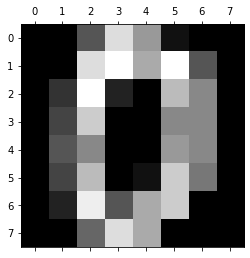

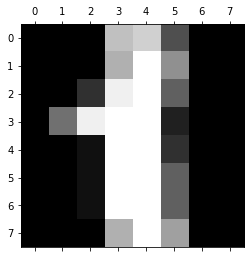

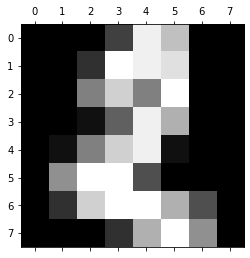

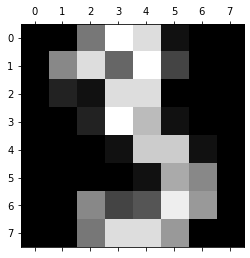

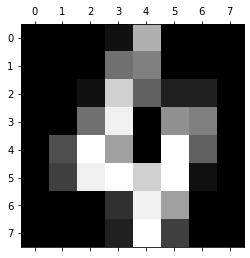

In [26]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [27]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.1)

In [30]:
X_train.shape

(1617, 64)

In [31]:
X_test.shape

(180, 64)

In [32]:
y_train.shape

(1617,)

In [33]:
y_test.shape

(180,)

In [34]:
# Cresting Logistic Regression Object
from sklearn.linear_model import LogisticRegression
digits_model = LogisticRegression()

In [35]:
# Training Model
digits_model.fit(X_train,y_train)

LogisticRegression()

In [38]:
# Model Score : Testing Data
print("Model Score : {:.4f}".format(digits_model.score(X_test,y_test)))

Model Score : 0.9611


In [75]:
# Comparing
random_sample = []
random_sample_target = []
random_sample_index = []

for i in range(0,500):
    x = random.randrange(len(digits.data))
    random_sample_index.append(x)
    random_sample_target.append(digits.target[x])
    random_sample.append(digits.data[x])

predicted_digits = digits_model.predict(random_sample)
predicted_digits

array([9, 1, 7, 7, 5, 6, 9, 3, 6, 8, 0, 4, 0, 7, 4, 1, 9, 4, 3, 5, 6, 2,
       2, 0, 9, 8, 2, 3, 3, 7, 3, 1, 8, 6, 4, 5, 5, 8, 1, 6, 0, 5, 2, 7,
       0, 2, 7, 2, 1, 8, 5, 4, 9, 6, 2, 2, 5, 4, 5, 1, 3, 9, 6, 7, 6, 4,
       3, 6, 0, 9, 3, 8, 8, 4, 8, 7, 8, 9, 1, 6, 5, 3, 7, 2, 9, 0, 8, 6,
       0, 8, 7, 0, 1, 5, 1, 5, 0, 4, 3, 2, 0, 4, 2, 0, 5, 5, 0, 5, 7, 4,
       6, 7, 5, 2, 4, 3, 4, 4, 4, 9, 1, 9, 5, 4, 8, 7, 4, 2, 1, 6, 0, 1,
       9, 9, 4, 9, 5, 7, 0, 3, 6, 8, 0, 4, 0, 5, 1, 7, 3, 8, 7, 2, 8, 2,
       8, 9, 4, 7, 2, 2, 4, 8, 7, 8, 9, 9, 2, 8, 0, 5, 1, 6, 8, 5, 1, 2,
       4, 2, 4, 0, 2, 3, 8, 6, 3, 0, 0, 7, 0, 8, 0, 5, 7, 2, 9, 7, 9, 9,
       3, 7, 7, 0, 5, 8, 1, 1, 0, 4, 1, 3, 2, 3, 6, 9, 6, 5, 3, 3, 7, 3,
       6, 0, 2, 8, 8, 5, 0, 6, 1, 4, 7, 6, 9, 6, 7, 8, 1, 6, 5, 2, 1, 6,
       6, 6, 9, 7, 3, 7, 3, 4, 6, 4, 7, 2, 9, 6, 1, 1, 1, 7, 4, 6, 3, 0,
       6, 4, 0, 3, 1, 9, 6, 2, 1, 0, 6, 0, 7, 7, 0, 6, 2, 7, 7, 2, 3, 0,
       2, 1, 5, 4, 7, 6, 9, 0, 7, 5, 3, 1, 7, 7, 5,

In [76]:
# Results
result = pd.DataFrame({'Actual Digit':random_sample_target,'Predicted Digit':predicted_digits})
result

,Actual Digit,Predicted Digit
0,9,9
1,1,1
2,7,7
3,7,7
4,5,5
...,...,...
495,4,4
496,2,2
497,7,7
498,8,8


In [78]:
# Analysing using confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(random_sample_target,predicted_digits)
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47]], dtype=int64)

Text(69.0, 0.5, 'Actual')

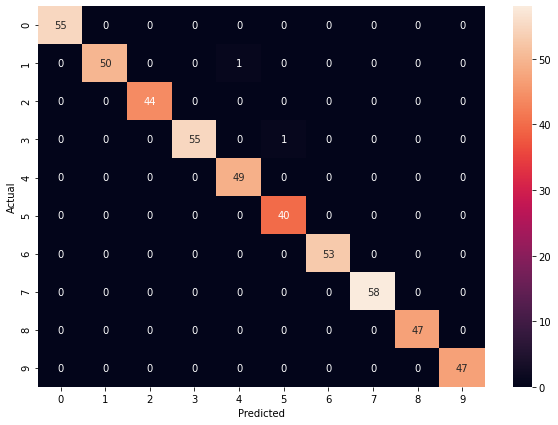

In [79]:
# Visualization using heatmap
import seaborn as sbn
plt.figure(figsize = (10,7))
sbn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [80]:
# Exporting Result to CSV file
result.to_csv("result.csv",index=False)

In [81]:
# Saving Model to binary file
import joblib
joblib.dump(digits_model,"digit-predictor-model")

['digit-predictor-model']